In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl

In [2]:
mpl.rcParams.update({
    "font.family":        "sans-serif",
    "font.sans-serif":    ["Arial"],
    "font.size":          8.5,
    "axes.titlesize":     9.0,
    "axes.labelsize":     9.0,
    "xtick.labelsize":    8.0,
    "ytick.labelsize":    8.0,
    "legend.fontsize":    8.0,

    "axes.linewidth":     0.8,
    "xtick.major.size":   3.0,
    "xtick.major.width":  0.8,
    "ytick.major.size":   3.0,
    "ytick.major.width":  0.8,
    "xtick.minor.size":   1.5,
    "xtick.minor.width":  0.5,
    "ytick.minor.size":   1.5,
    "ytick.minor.width":  0.5,
    "xtick.minor.visible": False,
    "ytick.minor.visible": True,

    "xtick.direction":    "out",
    "ytick.direction":    "out",
    "xtick.major.pad":    3,
    "ytick.major.pad":    3,

    "axes.labelpad":      4,
    "axes.titlepad":      5,

    "lines.linewidth":    1.0,
    "axes.grid":          False,

    "savefig.dpi":        300,
    "savefig.bbox":       "tight",
})

In [3]:
fvalue1 = 50
fvalue2 = 125
margin  = 125

site   = 'AU-Preston'

noveg_f   = f'../model_output/urb/{site}/history/'
slab_f    = f'../model_output/slab/{site}/history/'
veg_f     = f'../model_output/veg/{site}/history/'
veg_noirr = f'../model_output/no_irr/{site}/history/'
obs_f     = f'../model_output/obs/'

mod_vars = ['f_sr', 'f_olrg', 'f_rnet', 'f_fsena', 'f_lfevpa', 'f_fgrnd']
obs_vars = ['SWup', 'LWup', 'Rnet', 'Qh', 'Qle', 'Qg']

xlim_min, xlim_max = -1, 24


In [4]:
# ================== colors ==================
c_noirr   = '#D94738'   # Urb_Veg
c_urb   = '#3B5387'   # Urb
c_slab  = '#DB9850'      # Slab
c_veg = '#6BB48F'   # Urb_Veg (NoIrr)
c_obs   = 'black'

In [5]:
# ================== open datasets ==================
mod_veg_ds   = xr.open_dataset(veg_f + site + '.nc')        # Urb_Veg
mod_noirr_ds = xr.open_dataset(veg_noirr + site + '.nc')    # Urb_Veg (NoIrr)
mod_urb_ds   = xr.open_dataset(noveg_f + site + '.nc')      # Urb
mod_slab_ds  = xr.open_dataset(slab_f + site + '.nc')       # Slab

obs_ds = xr.open_dataset(obs_f + site + '_clean_observations_v1.nc')
utc    = obs_ds.attrs.get('local_utc_offset_hours')

/tmp/ipykernel_483227/835777796.py:265: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


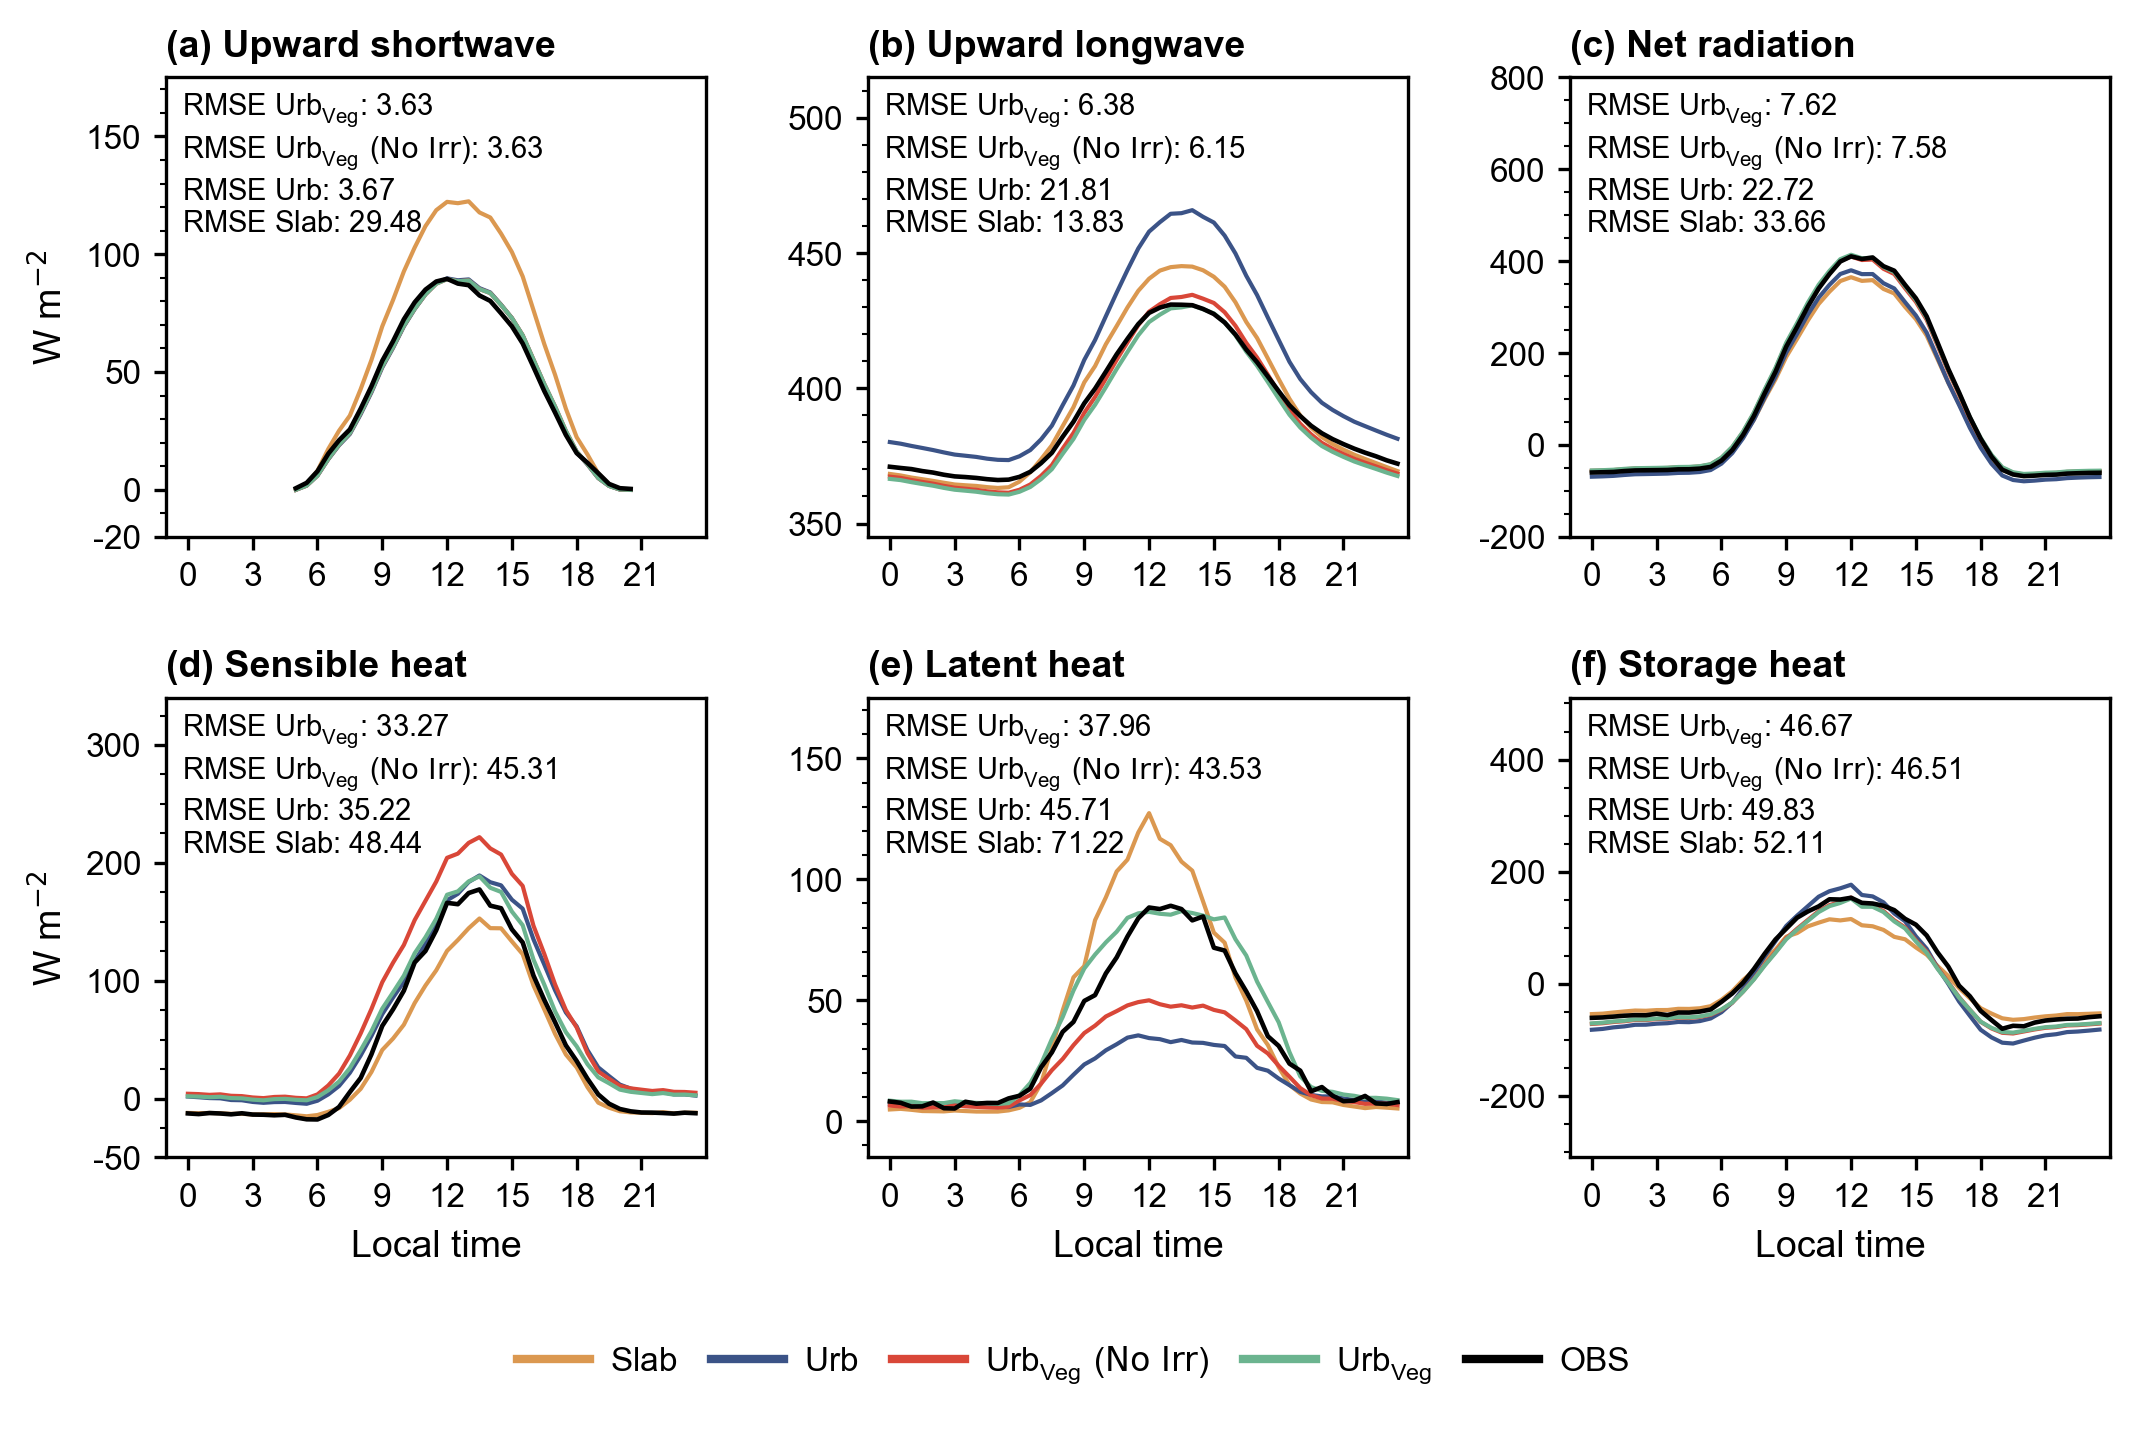

In [6]:
# ================== figure: 2 rows × 3 columns ==================
fig = plt.figure(figsize=(7.2, 4.8), dpi=300)

legend_handles = None
legend_labels  = None

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)

    mod_var = mod_vars[i]
    obs_var = obs_vars[i]

    # ===== extract variables =====
    if obs_var == 'Rnet':
        var_mod_veg  = mod_veg_ds['f_xy_solarin']  + mod_veg_ds['f_xy_frl']  - mod_veg_ds['f_sr']  - mod_veg_ds['f_olrg']
        var_mod_noi  = mod_noirr_ds['f_xy_solarin']+ mod_noirr_ds['f_xy_frl']- mod_noirr_ds['f_sr']- mod_noirr_ds['f_olrg']
        var_mod_urb  = mod_urb_ds['f_xy_solarin']  + mod_urb_ds['f_xy_frl']  - mod_urb_ds['f_sr']  - mod_urb_ds['f_olrg']
        var_mod_slab = mod_slab_ds['f_xy_solarin'] + mod_slab_ds['f_xy_frl'] - mod_slab_ds['f_sr'] - mod_slab_ds['f_olrg']

        SWdown  = xr.where((mod_veg_ds['f_xy_solarin'] == 0), 0, obs_ds['SWdown'][:-1])
        SWup    = xr.where((mod_veg_ds['f_xy_solarin'] == 0), 0, obs_ds['SWup'][:-1])
        LWdown  = obs_ds['LWdown'][:-1]
        LWup    = obs_ds['LWup'][:-1]
        var_obs = SWdown + LWdown - SWup - LWup

        var_mod_veg.name  = 'f_rnet'
        var_mod_noi.name  = 'f_rnet'
        var_mod_urb.name  = 'f_rnet'
        var_mod_slab.name = 'f_rnet'
        var_obs.name      = 'Rnet'

    elif obs_var == 'Qg':
        var_mod_veg = (mod_veg_ds['f_xy_solarin'] + mod_veg_ds['f_xy_frl']
                       - mod_veg_ds['f_sr'] - mod_veg_ds['f_olrg']
                       - mod_veg_ds['f_fsena'] - mod_veg_ds['f_lfevpa'])
        var_mod_noi = (mod_noirr_ds['f_xy_solarin'] + mod_noirr_ds['f_xy_frl']
                       - mod_noirr_ds['f_sr'] - mod_noirr_ds['f_olrg']
                       - mod_noirr_ds['f_fsena'] - mod_noirr_ds['f_lfevpa'])
        var_mod_urb = (mod_urb_ds['f_xy_solarin'] + mod_urb_ds['f_xy_frl']
                       - mod_urb_ds['f_sr'] - mod_urb_ds['f_olrg']
                       - mod_urb_ds['f_fsena'] - mod_urb_ds['f_lfevpa'])
        var_mod_slab = mod_slab_ds['f_fgrnd']

        SWdown  = xr.where((mod_veg_ds['f_xy_solarin'] == 0), 0, obs_ds['SWdown'][:-1])
        SWup    = xr.where((mod_veg_ds['f_xy_solarin'] == 0), 0, obs_ds['SWup'][:-1])
        LWdown  = obs_ds['LWdown'][:-1]
        LWup    = obs_ds['LWup'][:-1]
        var_obs = (SWdown + LWdown - SWup - LWup
                   - obs_ds['Qh'][:-1] - obs_ds['Qle'][:-1])

        var_mod_veg.name  = 'f_fgrnd'
        var_mod_noi.name  = 'f_fgrnd'
        var_mod_urb.name  = 'f_fgrnd'
        var_mod_slab.name = 'f_fgrnd'
        var_obs.name      = 'Qg'

    else:
        var_mod_veg  = mod_veg_ds[mod_var]
        var_mod_noi  = mod_noirr_ds[mod_var]
        var_mod_urb  = mod_urb_ds[mod_var]
        var_mod_slab = mod_slab_ds[mod_var]

        var_obs = obs_ds[obs_var].copy()  # 更稳健：避免视图赋值问题

        swdown  = obs_ds['SWdown'][:-1]
        moddown = mod_veg_ds['f_xy_solarin'][:, 0]
        swdown  = xr.where(moddown == 0, 0, swdown)

        var_obs_vals = var_obs.values.copy()
        mask = (np.isnan(swdown.values) | np.isnan(var_obs_vals[:-1]))
        var_obs_vals[:-1] = np.where(mask, np.nan, var_obs_vals[:-1])
        var_obs_vals[-1] = np.nan
        var_obs = xr.DataArray(var_obs_vals, coords=var_obs.coords, dims=var_obs.dims, name=var_obs.name)

    # ===== only annual =====
    global_min_value = float('inf')
    global_max_value = float('-inf')

    RMSE_veg, RMSE_noi, RMSE_urb, RMSE_slab = [], [], [], []
    seasonal_data = []

    seasons = {'Annual': [1,2,3,4,5,6,7,8,9,10,11,12]}

    for season_name, months in seasons.items():
        slab_flt = var_mod_slab.assign_coords(time=var_mod_slab.time + pd.Timedelta(hours=utc))
        urb_flt  = var_mod_urb.assign_coords(time=var_mod_urb.time + pd.Timedelta(hours=utc))
        noi_flt  = var_mod_noi.assign_coords(time=var_mod_noi.time + pd.Timedelta(hours=utc))
        veg_flt  = var_mod_veg.assign_coords(time=var_mod_veg.time + pd.Timedelta(hours=utc))
        obs_flt  = var_obs.assign_coords(time=var_obs.time + pd.Timedelta(hours=utc))

        veg_flt  = veg_flt.sel(time=veg_flt.time.dt.month.isin(months))
        noi_flt  = noi_flt.sel(time=noi_flt.time.dt.month.isin(months))
        urb_flt  = urb_flt.sel(time=urb_flt.time.dt.month.isin(months))
        slab_flt = slab_flt.sel(time=slab_flt.time.dt.month.isin(months))
        obs_flt  = obs_flt.sel(time=obs_flt.time.dt.month.isin(months))

        veg_df  = veg_flt.to_dataframe().reset_index()
        noi_df  = noi_flt.to_dataframe().reset_index()
        urb_df  = urb_flt.to_dataframe().reset_index()
        slab_df = slab_flt.to_dataframe().reset_index()
        obs_df  = obs_flt.to_dataframe().reset_index()

        veg_m  = pd.merge(veg_df,  obs_df, on='time', suffixes=('_veg', '_obs'))
        noi_m  = pd.merge(noi_df,  obs_df, on='time', suffixes=('_noi', '_obs'))
        urb_m  = pd.merge(urb_df,  obs_df, on='time', suffixes=('_urb', '_obs'))
        slab_m = pd.merge(slab_df, obs_df, on='time', suffixes=('_slab','_obs'))

        veg_m.loc[veg_m[obs_var].isna(),  mod_var] = pd.NA
        noi_m.loc[noi_m[obs_var].isna(),  mod_var] = pd.NA
        urb_m.loc[urb_m[obs_var].isna(),  mod_var] = pd.NA
        slab_m.loc[slab_m[obs_var].isna(), mod_var] = pd.NA

        for df in (veg_m, noi_m, urb_m, slab_m):
            df['hour'] = df['time'].dt.hour + df['time'].dt.minute / 60.0

        daily_avg_veg  = veg_m.groupby('hour', dropna=False)[mod_var].mean()
        daily_avg_noi  = noi_m.groupby('hour', dropna=False)[mod_var].mean()
        daily_avg_urb  = urb_m.groupby('hour', dropna=False)[mod_var].mean()
        daily_avg_slab = slab_m.groupby('hour', dropna=False)[mod_var].mean()
        daily_avg_obs  = veg_m.groupby('hour', dropna=False)[obs_var].mean()

        q1_veg = veg_m.groupby('hour', dropna=False)[mod_var].quantile(0.25)
        q3_veg = veg_m.groupby('hour', dropna=False)[mod_var].quantile(0.75)
        q1_noi = noi_m.groupby('hour', dropna=False)[mod_var].quantile(0.25)
        q3_noi = noi_m.groupby('hour', dropna=False)[mod_var].quantile(0.75)
        q1_urb = urb_m.groupby('hour', dropna=False)[mod_var].quantile(0.25)
        q3_urb = urb_m.groupby('hour', dropna=False)[mod_var].quantile(0.75)
        q1_slab= slab_m.groupby('hour', dropna=False)[mod_var].quantile(0.25)
        q3_slab= slab_m.groupby('hour', dropna=False)[mod_var].quantile(0.75)
        q1_obs = veg_m.groupby('hour', dropna=False)[obs_var].quantile(0.25)
        q3_obs = veg_m.groupby('hour', dropna=False)[obs_var].quantile(0.75)

        RMSE_veg.append(np.sqrt(np.nanmean((veg_m[mod_var]  - veg_m[obs_var]) ** 2)))
        RMSE_noi.append(np.sqrt(np.nanmean((noi_m[mod_var]  - noi_m[obs_var]) ** 2)))
        RMSE_urb.append(np.sqrt(np.nanmean((urb_m[mod_var]  - urb_m[obs_var]) ** 2)))
        RMSE_slab.append(np.sqrt(np.nanmean((slab_m[mod_var] - slab_m[obs_var]) ** 2)))

        min_value_ = min(daily_avg_veg.min(),  q1_veg.min(),
                         daily_avg_noi.min(),  q1_noi.min(),
                         daily_avg_urb.min(),  q1_urb.min(),
                         daily_avg_slab.min(), q1_slab.min(),
                         daily_avg_obs.min(),  q1_obs.min())
        max_value_ = max(daily_avg_veg.max(),  q3_veg.max(),
                         daily_avg_noi.max(),  q3_noi.max(),
                         daily_avg_urb.max(),  q3_urb.max(),
                         daily_avg_slab.max(), q3_slab.max(),
                         daily_avg_obs.max(),  q3_obs.max())
        global_min_value = min(global_min_value, min_value_)
        global_max_value = max(global_max_value, max_value_)

        seasonal_data.append({
            'daily_avg_veg':  daily_avg_veg,
            'daily_avg_noi':  daily_avg_noi,
            'daily_avg_urb':  daily_avg_urb,
            'daily_avg_slab': daily_avg_slab,
            'daily_avg_obs':  daily_avg_obs,
            'title': f'{site}, 2003.08–2004.11'
        })

    ylim_min = np.floor((global_min_value - margin) / fvalue1) * fvalue1
    ylim_max = np.ceil((global_max_value + margin) / fvalue2) * fvalue2

    for j, season_data in enumerate(seasonal_data):
        text_str = (
            r"RMSE $\mathregular{Urb_{Veg}}$: %.2f"          % RMSE_veg[0] + "\n" +
            r"RMSE $\mathregular{Urb_{Veg}\ (\text{No Irr})}$: %.2f" % RMSE_noi[0] + "\n" +
            r"RMSE $\mathregular{Urb}$: %.2f"               % RMSE_urb[0] + "\n" +
            r"RMSE $\mathregular{Slab}$: %.2f"              % RMSE_slab[0]
        )
        ax.text(
            0.03, 0.97, text_str,
            transform=ax.transAxes,
            va="top", ha="left",
            fontsize=7,
            bbox=dict(facecolor="none", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2")
        )

        # plot lines (capture handles from the first subplot only)
        l1, = ax.plot(season_data['daily_avg_slab'].index, season_data['daily_avg_slab'],
                      label=r'$\mathregular{Slab}$', color=c_slab, linestyle='-')
        l2, = ax.plot(season_data['daily_avg_urb'].index, season_data['daily_avg_urb'],
                      label=r'$\mathregular{Urb}$', color=c_urb, linestyle='-')
        l3, = ax.plot(season_data['daily_avg_noi'].index, season_data['daily_avg_noi'],
                      label=r'$\mathregular{Urb_{Veg}\ (\text{No Irr})}$', color=c_noirr, linestyle='-')
        l4, = ax.plot(season_data['daily_avg_veg'].index, season_data['daily_avg_veg'],
                      label=r'$\mathregular{Urb_{Veg}}$', color=c_veg, linestyle='-')

        l5, = ax.plot(season_data['daily_avg_obs'].index, season_data['daily_avg_obs'],
                      label='OBS', color=c_obs, linestyle='-', linewidth=1.1)

        if legend_handles is None:
            # 固定 legend 顺序
            legend_handles = [l1, l2, l3, l4, l5]
            legend_labels  = [h.get_label() for h in legend_handles]

        # variable-specific y-limits
        if obs_var == 'SWup':
            ylim_min, ylim_max = -20, 175
        elif obs_var == 'LWup':
            ylim_min, ylim_max = 345, 515
        elif obs_var == 'Rnet':
            ylim_min, ylim_max = -200, 800
        elif obs_var == 'Qh':
            ylim_min, ylim_max = -50, 340
        elif obs_var == 'Qle':
            ylim_min, ylim_max = -15, 175
        elif obs_var == 'Qg':
            ylim_min, ylim_max = -310, 510

        ax.set_ylim(ylim_min, ylim_max)
        ax.set_xlim(xlim_min, xlim_max)

        ax.tick_params(axis='x', which='major', top=False)
        ax.tick_params(axis='y', which='major', right=False)
        ax.tick_params(axis='y', which='minor', right=False)

        # panel titles
        if obs_var == 'SWup':
            y_ticks = [-20, 0, 50, 100, 150]
            ax.set_yticks(y_ticks)
            ax.yaxis.set_minor_locator(MultipleLocator(10))
            ax.set_title('(a) Upward shortwave', loc="left", fontweight="bold")
        elif obs_var == 'LWup':
            y_ticks = [350, 400, 450, 500]
            ax.set_yticks(y_ticks)
            ax.yaxis.set_minor_locator(MultipleLocator(10))
            ax.set_title('(b) Upward longwave', loc="left", fontweight="bold")
        elif obs_var == 'Rnet':
            ax.set_title('(c) Net radiation',  loc="left", fontweight="bold")
        elif obs_var == 'Qh':
            y_ticks = [-50, 0, 100, 200, 300]
            ax.set_yticks(y_ticks)
            ax.yaxis.set_minor_locator(MultipleLocator(25))
            ax.set_title('(d) Sensible heat', loc="left", fontweight="bold")
        elif obs_var == 'Qle':
            y_ticks = [0, 50, 100, 150]
            ax.set_yticks(y_ticks)
            ax.yaxis.set_minor_locator(MultipleLocator(10))
            ax.set_title('(e) Latent heat',   loc="left", fontweight="bold")
        elif obs_var == 'Qg':
            ax.set_title('(f) Storage heat',  loc="left", fontweight="bold")

        ax.set_xticks(range(0, 24, 3))
        ax.xaxis.set_minor_locator(ticker.NullLocator())

        if i in (0, 3):
            ax.set_ylabel(r'W m$^{-2}$')
        if i >= 3:
            ax.set_xlabel('Local time')

# ===== FIGURE-LEVEL LEGEND (bottom, outside axes) =====
fig.subplots_adjust(hspace=0.35, wspace=0.3, left=0.08, right=0.98, top=0.95, bottom=0.20)

leg=fig.legend(
    legend_handles, legend_labels,
    loc='lower center',
    ncol=5,
    frameon=False,
    bbox_to_anchor=(0.5, 0.02),
    handlelength=2.2,
    handletextpad=0.6,
    columnspacing=1.0,
)

for lh in leg.legendHandles:
    lh.set_linewidth(2)

plt.savefig('Figure13.pdf', bbox_inches='tight', dpi=300)

In [7]:
# close datasets
mod_veg_ds.close()
mod_noirr_ds.close()
mod_urb_ds.close()
mod_slab_ds.close()
obs_ds.close()
